## Numpy Basics: Arrays and Vector Computation

In [1]:
import numpy as np # no need to pip install, already bundled with Anaconda

np.random.seed(12345) # this ensures any random nums have an arbitrary seed
np.set_printoptions(precision=4) # all outputs below will be up to 4 decimal places

In [2]:
c = 1.23456
print(c) # without numpy

1.23456


In [3]:
# arange ie array-range is a data structure in numpy
my_ar = np.arange(1000000)
my_ar
#type(my_ar) # a-range returns an n-dimensional array

array([     0,      1,      2, ..., 999997, 999998, 999999])

### numpy arrays are efficient partly becuase they allow only one data type

In [4]:
# explore the perf of a numpy array vs a normal python range
py_list = list(range(1000000)) # 1 mil
# jupyter has an immediate syntax to measure time taken to run a command
%time for i in range(10): my_ar2 = my_ar*2 # multiply each arange num by 2
%time for i in range(10): py_list2 = [x*2 for x in py_list]

Wall time: 32.9 ms
Wall time: 1.47 s


In [5]:
# arrays can be multi-dimennsional
data = np.random.randn(2,3) # a 2x3 array
data, data*3 # more than one output will be returned as a tuple

(array([[-0.2047,  0.4789, -0.5194],
        [-0.5557,  1.9658,  1.3934]]),
 array([[-0.6141,  1.4368, -1.5583],
        [-1.6672,  5.8973,  4.1802]]))

In [6]:
# arrays have shape and type
data.shape, data.dtype

((2, 3), dtype('float64'))

In [7]:
d2 = [[7,6,5,4],[-2,-3,-4,-5]] # list of lists
ar3 = np.array(d2)
ar3.shape, ar3.dtype, ar3.ndim

((2, 4), dtype('int32'), 2)

### numpy has several constrcutors for arrays

In [8]:
z = np.zeros((3,4,6)) # 3 arrays of 4x6, 3-dim array of zeros, there is no limit on how mnay dimensions
z

array([[[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]])

In [9]:
e = np.empty((2,3,3)) # numpy claims an untagged/ unused part of memory and calls it an empty array
e

array([[[6.2304e-307, 4.6730e-307, 1.6912e-306],
        [1.8692e-306, 1.7802e-306, 1.4242e-306],
        [1.3796e-306, 1.6022e-306, 1.2461e-306]],

       [[9.3460e-307, 1.2461e-306, 1.1126e-306],
        [1.6022e-306, 1.5132e-306, 9.3461e-307],
        [1.8692e-306, 1.2461e-306, 1.4241e-306]]])

In [10]:
# we can force a data type
a1 = np.array([1,2,3], dtype = np.float32)
a1.dtype, a1

(dtype('float32'), array([1., 2., 3.], dtype=float32))

In [11]:
n_s = np.array(['1.25','9.6','-42'], dtype=np.string_)
n_s.dtype # 4-byte string
n_f = n_s.astype(float) # typecasting
n_f.dtype

dtype('float64')

In [12]:
# math operations between 2 arrays
e ** n_f

<ipython-input-12-d12109d2f737>:2: RuntimeWarning: overflow encountered in power
  e ** n_f


array([[[ 0.,  0., inf],
        [ 0.,  0., inf],
        [ 0.,  0., inf]],

       [[ 0.,  0., inf],
        [ 0.,  0., inf],
        [ 0.,  0., inf]]])

In [13]:
e < n_f

array([[[ True,  True, False],
        [ True,  True, False],
        [ True,  True, False]],

       [[ True,  True, False],
        [ True,  True, False],
        [ True,  True, False]]])

### we can slice arrays much like slicing other python collections

In [14]:
a = np.arange(10)
a[5:8] # start : stopbefore
a[1:9:3] # start : stopbefore : step

array([1, 4, 7])

In [15]:
a_s = a[5:9] # a reference to a part of the array
a[6] = -9 # mutate the original
a, a_s

(array([ 0,  1,  2,  3,  4,  5, -9,  7,  8,  9]), array([ 5, -9,  7,  8]))

In [16]:
# if we dont want references, we can create copies
b = a.copy()
b

array([ 0,  1,  2,  3,  4,  5, -9,  7,  8,  9])

In [17]:
a[7]=99
a, b, a_s

(array([ 0,  1,  2,  3,  4,  5, -9, 99,  8,  9]),
 array([ 0,  1,  2,  3,  4,  5, -9,  7,  8,  9]),
 array([ 5, -9, 99,  8]))

### using indexing

In [18]:
names = np.array(['Amy', 'Beater', 'Cathy', 'Deidre'])
data = np.random.randn(4,3)
data

array([[ 0.0929,  0.2817,  0.769 ],
       [ 1.2464,  1.0072, -1.2962],
       [ 0.275 ,  0.2289,  1.3529],
       [ 0.8864, -2.0016, -0.3718]])

In [19]:
names == 'Amy'

array([ True, False, False, False])

In [20]:
names >='Cathy'

array([False, False,  True,  True])

In [21]:
# datasets can be used to filter relevant and related data
data[names=='Beater'] # data[False, True, False, False] returns data[1]

array([[ 1.2464,  1.0072, -1.2962]])

### correlation is not causation!

## Re-shaping Data

In [22]:
# most operations in numpy and Pandas are not persistent
arr = np.arange(32) # one-dim array
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [23]:
arr.reshape(8,4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [24]:
arr # arr.reshape did not persist result back into arr, did not mutate

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [25]:
arr2 = arr.reshape(8,4)
arr, arr2

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23],
        [24, 25, 26, 27],
        [28, 29, 30, 31]]))

In [26]:
arr3 = arr2.T # transpose
arr2, arr3

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23],
        [24, 25, 26, 27],
        [28, 29, 30, 31]]),
 array([[ 0,  4,  8, 12, 16, 20, 24, 28],
        [ 1,  5,  9, 13, 17, 21, 25, 29],
        [ 2,  6, 10, 14, 18, 22, 26, 30],
        [ 3,  7, 11, 15, 19, 23, 27, 31]]))

## numpy has dot-arithmetic [array1].[array2]

In [27]:
r = np.dot(arr2.T, arr2)
r

array([[2240, 2352, 2464, 2576],
       [2352, 2472, 2592, 2712],
       [2464, 2592, 2720, 2848],
       [2576, 2712, 2848, 2984]])

In [28]:
# simpler example
da = np.array([[1,2],[1,2]])
db = np.array([[10,20],[30,40]])
s = np.dot(da,db)
s

array([[ 70, 100],
       [ 70, 100]])

## fast element-wise array funcs

In [29]:
arr = np.arange(10)
np.sqrt(arr)

array([0.    , 1.    , 1.4142, 1.7321, 2.    , 2.2361, 2.4495, 2.6458,
       2.8284, 3.    ])

In [30]:
np.median(arr) # median of 0,1,2,3,4,5,6,7,8,9 is 4.5

4.5

In [31]:
np.min(arr), np.max(arr)

(0, 9)

# Array-Oriented Programming

In [32]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris_2d = np.genfromtxt(url, delimiter=',')
iris_2d.shape, iris_2d

((150, 5),
 array([[5.1, 3.5, 1.4, 0.2, nan],
        [4.9, 3. , 1.4, 0.2, nan],
        [4.7, 3.2, 1.3, 0.2, nan],
        [4.6, 3.1, 1.5, 0.2, nan],
        [5. , 3.6, 1.4, 0.2, nan],
        [5.4, 3.9, 1.7, 0.4, nan],
        [4.6, 3.4, 1.4, 0.3, nan],
        [5. , 3.4, 1.5, 0.2, nan],
        [4.4, 2.9, 1.4, 0.2, nan],
        [4.9, 3.1, 1.5, 0.1, nan],
        [5.4, 3.7, 1.5, 0.2, nan],
        [4.8, 3.4, 1.6, 0.2, nan],
        [4.8, 3. , 1.4, 0.1, nan],
        [4.3, 3. , 1.1, 0.1, nan],
        [5.8, 4. , 1.2, 0.2, nan],
        [5.7, 4.4, 1.5, 0.4, nan],
        [5.4, 3.9, 1.3, 0.4, nan],
        [5.1, 3.5, 1.4, 0.3, nan],
        [5.7, 3.8, 1.7, 0.3, nan],
        [5.1, 3.8, 1.5, 0.3, nan],
        [5.4, 3.4, 1.7, 0.2, nan],
        [5.1, 3.7, 1.5, 0.4, nan],
        [4.6, 3.6, 1. , 0.2, nan],
        [5.1, 3.3, 1.7, 0.5, nan],
        [4.8, 3.4, 1.9, 0.2, nan],
        [5. , 3. , 1.6, 0.2, nan],
        [5. , 3.4, 1.6, 0.4, nan],
        [5.2, 3.5, 1.5, 0.2, nan],
        [

In [33]:
# save this data locally
np.save('iris_arr.npy', iris_2d) # saves it to where the notebook is saved

In [34]:
retrieved = np.load('iris_arr.npy')
retrieved

array([[5.1, 3.5, 1.4, 0.2, nan],
       [4.9, 3. , 1.4, 0.2, nan],
       [4.7, 3.2, 1.3, 0.2, nan],
       [4.6, 3.1, 1.5, 0.2, nan],
       [5. , 3.6, 1.4, 0.2, nan],
       [5.4, 3.9, 1.7, 0.4, nan],
       [4.6, 3.4, 1.4, 0.3, nan],
       [5. , 3.4, 1.5, 0.2, nan],
       [4.4, 2.9, 1.4, 0.2, nan],
       [4.9, 3.1, 1.5, 0.1, nan],
       [5.4, 3.7, 1.5, 0.2, nan],
       [4.8, 3.4, 1.6, 0.2, nan],
       [4.8, 3. , 1.4, 0.1, nan],
       [4.3, 3. , 1.1, 0.1, nan],
       [5.8, 4. , 1.2, 0.2, nan],
       [5.7, 4.4, 1.5, 0.4, nan],
       [5.4, 3.9, 1.3, 0.4, nan],
       [5.1, 3.5, 1.4, 0.3, nan],
       [5.7, 3.8, 1.7, 0.3, nan],
       [5.1, 3.8, 1.5, 0.3, nan],
       [5.4, 3.4, 1.7, 0.2, nan],
       [5.1, 3.7, 1.5, 0.4, nan],
       [4.6, 3.6, 1. , 0.2, nan],
       [5.1, 3.3, 1.7, 0.5, nan],
       [4.8, 3.4, 1.9, 0.2, nan],
       [5. , 3. , 1.6, 0.2, nan],
       [5. , 3.4, 1.6, 0.4, nan],
       [5.2, 3.5, 1.5, 0.2, nan],
       [5.2, 3.4, 1.4, 0.2, nan],
       [4.7, 3

In [35]:
# we may choose to compress the data
np.savez_compressed('iris_compressed.npz',i=iris_2d)

In [36]:
ret_compr = np.load('iris_compressed.npz')
ret_compr['i']

array([[5.1, 3.5, 1.4, 0.2, nan],
       [4.9, 3. , 1.4, 0.2, nan],
       [4.7, 3.2, 1.3, 0.2, nan],
       [4.6, 3.1, 1.5, 0.2, nan],
       [5. , 3.6, 1.4, 0.2, nan],
       [5.4, 3.9, 1.7, 0.4, nan],
       [4.6, 3.4, 1.4, 0.3, nan],
       [5. , 3.4, 1.5, 0.2, nan],
       [4.4, 2.9, 1.4, 0.2, nan],
       [4.9, 3.1, 1.5, 0.1, nan],
       [5.4, 3.7, 1.5, 0.2, nan],
       [4.8, 3.4, 1.6, 0.2, nan],
       [4.8, 3. , 1.4, 0.1, nan],
       [4.3, 3. , 1.1, 0.1, nan],
       [5.8, 4. , 1.2, 0.2, nan],
       [5.7, 4.4, 1.5, 0.4, nan],
       [5.4, 3.9, 1.3, 0.4, nan],
       [5.1, 3.5, 1.4, 0.3, nan],
       [5.7, 3.8, 1.7, 0.3, nan],
       [5.1, 3.8, 1.5, 0.3, nan],
       [5.4, 3.4, 1.7, 0.2, nan],
       [5.1, 3.7, 1.5, 0.4, nan],
       [4.6, 3.6, 1. , 0.2, nan],
       [5.1, 3.3, 1.7, 0.5, nan],
       [4.8, 3.4, 1.9, 0.2, nan],
       [5. , 3. , 1.6, 0.2, nan],
       [5. , 3.4, 1.6, 0.4, nan],
       [5.2, 3.5, 1.5, 0.2, nan],
       [5.2, 3.4, 1.4, 0.2, nan],
       [4.7, 3

In [37]:
!del iris_compressed.npz

C:\Users\etusmat\OneDrive - Ericsson AB\Share\Ericsson\pybeyond\jupyter\iris_compressed.npz


The process cannot access the file because it is being used by another process.


# Data visualization with numpy (and MatPlotLib)

In [39]:
nums = np.array([0.5, 0.7, 1.0, 1.2, 1.3, 2.1])
nums

array([0.5, 0.7, 1. , 1.2, 1.3, 2.1])

In [46]:
grpbins = np.array([-1,0,1,2,3]) # bins to group my numbers

In [47]:
# we need MatPlotLib to plot charts
import matplotlib.pyplot as plt

(array([0., 2., 3., 1.]),
 array([-1,  0,  1,  2,  3]),
 <BarContainer object of 4 artists>)

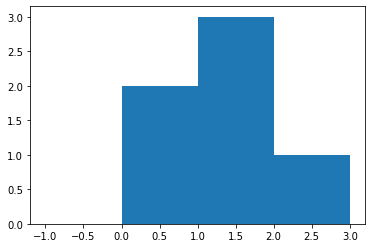

In [48]:
# plot a histogram using bins
plt.hist(nums, bins=grpbins)

In [50]:
# some complex plotting
points = np.arange(-5,5,0.001)
points
xs, ys = np.meshgrid(points, points) # 2d array of all our points
%time z = np.sqrt(xs**2 + ys**2)

Wall time: 2.37 s


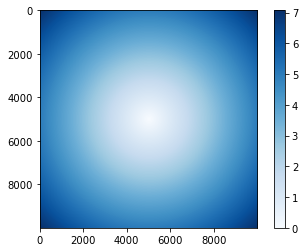

In [51]:
plt.imshow(z, cmap=plt.cm.Blues)
plt.colorbar()